1.Load the data.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Data Preprocessing

In [3]:
# Fill missing values for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [4]:
data = pd.get_dummies(data)


In [5]:
data.dtypes


Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 289, dtype: object

3. Perfroming EDA

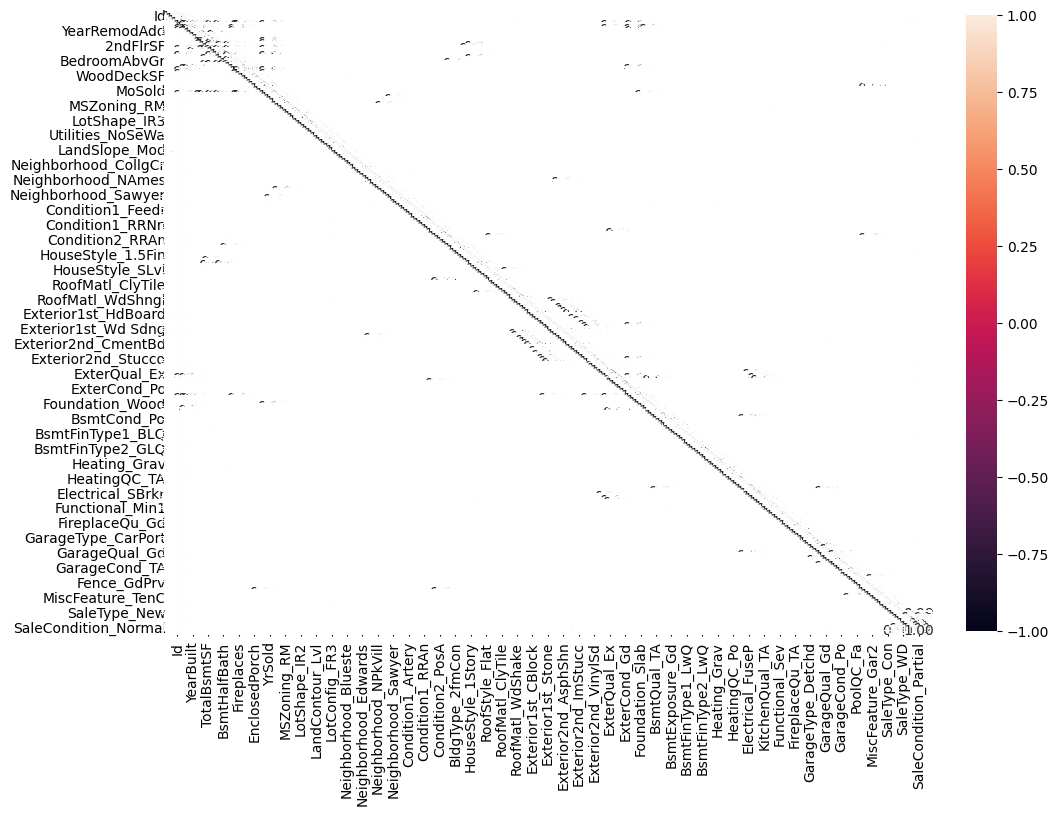

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()


4. Feature Engineering

In [7]:
# Define the target variable and features
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


5. Model Selection & Training

5.1.    Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')


Linear Regression MSE: 873794723.70535


5.2.    Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Decision Tree MSE: {mse}')


Decision Tree MSE: 1775387195.8219178


5.3.    Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {mse}')


Random Forest MSE: 824233237.7434072


6. Deep Learning model using Keras

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Deep Learning Model MSE: {mse}')


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [13]:
# Check for any remaining NaN values
assert data.isnull().sum().sum() == 0, "There are still missing values in the data."

# Convert all data to float32
data = data.astype('float32')


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ensure that TensorFlow is using float32 data types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Deep Learning Model MSE: {mse}')


Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 38054916096.0000 - val_loss: 35461165056.0000
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 34596610048.0000 - val_loss: 30621978624.0000
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 27822657536.0000 - val_loss: 21736036352.0000
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 18053613568.0000 - val_loss: 11324685312.0000
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 10178038784.0000 - val_loss: 5504702464.0000
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 7947576832.0000 - val_loss: 4104945664.0000
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 7035579392.0000 - val_loss: 3675699712.0000
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 6441481728.0000 - val_loss: 3488872448.0000
Epoch 9/50
30/30 [==============================] - 0s 4ms/ste